In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import AgglomerativeClustering 
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

In [30]:

fdata=pd.read_csv(r'C:\Users\Rayhan\Downloads\CC GENERAL.csv')
fdata

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [31]:
fdata.info()
fdata.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

1 missing value within CREDIT_LIMIT column.
313 missing value within MINIMUM_PAYMENTS column.

In [32]:
#cleaning_and_preprocessing:
print(fdata['MINIMUM_PAYMENTS'].value_counts())

fdata['MINIMUM_PAYMENTS'].fillna(fdata['MINIMUM_PAYMENTS'].mean(),inplace = True)
fdata['CREDIT_LIMIT'].fillna(fdata['CREDIT_LIMIT'].mean(),inplace = True)

fdata =fdata.drop('CUST_ID',axis=1)
fdata.head()

299.351881     2
3.197940       1
111.691332     1
129.682608     1
872.760983     1
              ..
1227.773229    1
127.210691     1
6422.472544    1
471.940554     1
189.459157     1
Name: MINIMUM_PAYMENTS, Length: 8636, dtype: int64


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [33]:

model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(fdata) 
agglomerative=pd.DataFrame(clust_labels)
agglomerative




,0
0,0
1,0
2,0
3,0
4,0
...,...
8945,0
8946,0
8947,0
8948,0


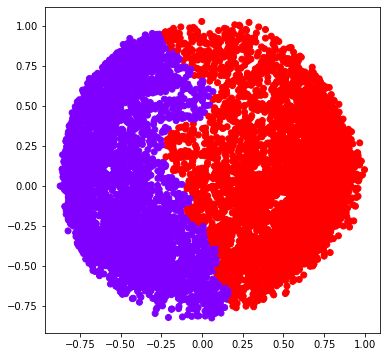

In [34]:
from sklearn.decomposition import PCA 
scaler = StandardScaler() 
fdata_scaled = scaler.fit_transform(fdata) 
  

fdata_normalized = normalize(fdata_scaled) 
  

fdata_normalized = pd.DataFrame(fdata_normalized) 
pca = PCA(n_components = 2) 
fdata_principal = pca.fit_transform(fdata_normalized) 
fdata_principal = pd.DataFrame(fdata_principal) 
fdata_principal.columns = ['P1', 'P2']
ac2 = AgglomerativeClustering(n_clusters = 2) 

plt.figure(figsize =(6, 6)) 
plt.scatter(fdata_principal['P1'], fdata_principal['P2'],  
           c = ac2.fit_predict(fdata_principal), cmap ='rainbow') 
plt.show() 

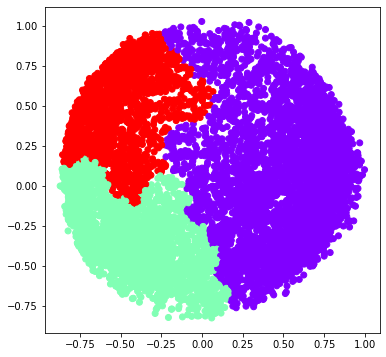

In [35]:
ac3 = AgglomerativeClustering(n_clusters = 3) 

plt.figure(figsize =(6, 6)) 
plt.scatter(fdata_principal['P1'], fdata_principal['P2'],  
           c = ac3.fit_predict(fdata_principal), cmap ='rainbow') 
plt.show() 

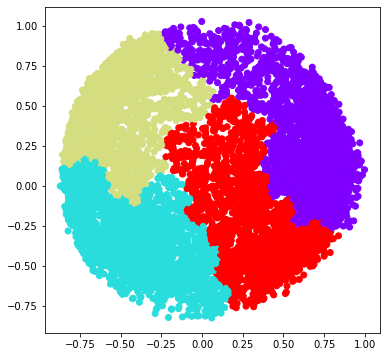

In [36]:
ac4 = AgglomerativeClustering(n_clusters = 4) 

plt.figure(figsize =(6, 6)) 
plt.scatter(fdata_principal['P1'], fdata_principal['P2'],  
           c = ac4.fit_predict(fdata_principal), cmap ='rainbow') 
plt.show() 

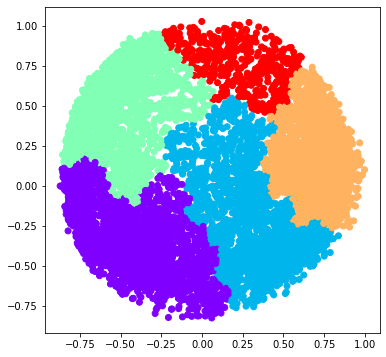

In [37]:
ac5 = AgglomerativeClustering(n_clusters = 5) 

plt.figure(figsize =(6, 6)) 
plt.scatter(fdata_principal['P1'], fdata_principal['P2'],  
           c = ac5.fit_predict(fdata_principal), cmap ='rainbow') 
plt.show() 

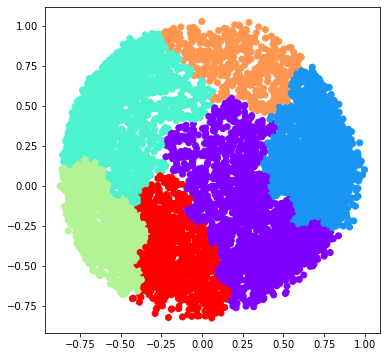

In [38]:
ac6 = AgglomerativeClustering(n_clusters = 6) 

plt.figure(figsize =(6, 6)) 
plt.scatter(fdata_principal['P1'], fdata_principal['P2'],  
           c = ac6.fit_predict(fdata_principal), cmap ='rainbow') 
plt.show() 

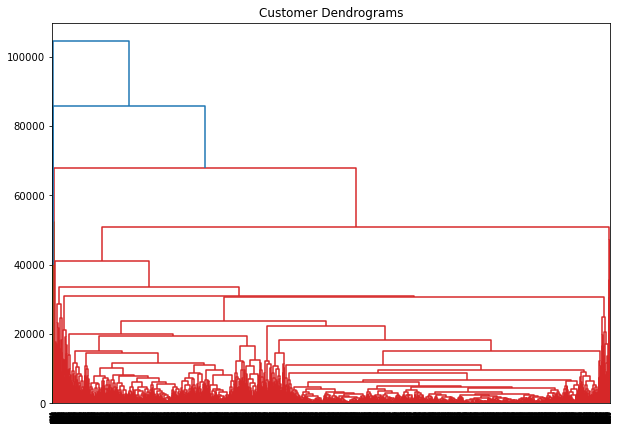

In [84]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(fdata, method="complete"))

In [67]:
sum_of_squared_distances=[]
k=range(1,15)
for K in k:
    km=KMeans(n_clusters=K)
    km=km.fit(fdata)
    sum_of_squared_distances.append(km.inertia_)

# k-means

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

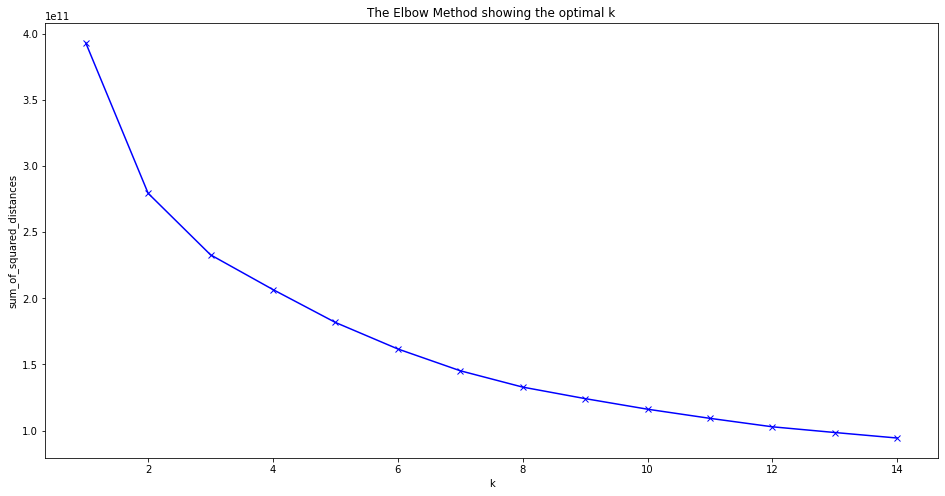

In [68]:
plt.figure(figsize=(16,8))
plt.plot(k, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('The Elbow Method showing the optimal k')


In [51]:
scaler = StandardScaler() 
fdata_scaled = scaler.fit_transform(fdata) 
  

fdata_normalized = normalize(fdata_scaled) 
  

fdata_normalized = pd.DataFrame(fdata_normalized) 
pca = PCA(n_components = 2) 
fdata_principal = pca.fit_transform(fdata_normalized) 
fdata_principal = pd.DataFrame(fdata_principal) 
fdata_principal.columns = ['P1', 'P2']

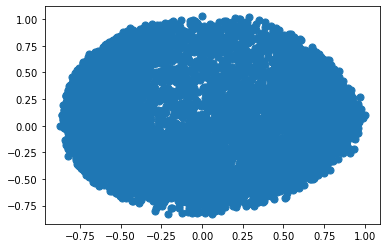

In [58]:

from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=8950, centers=3,
                       cluster_std=0.60, random_state=0)
plt.scatter(fdata_principal['P1'], fdata_principal['P2'], s=50)

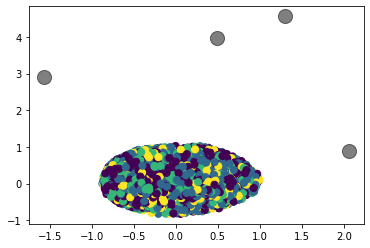

In [64]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(fdata_principal['P1'], fdata_principal['P2'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [75]:
#k=3
kmeans=KMeans(n_clusters=3, random_state=0)  
kmeans.fit(fdata)
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,0
1,1
2,1
3,1
4,0
...,...
8945,0
8946,0
8947,0
8948,0


In [77]:
fdata['label']=labels[0]

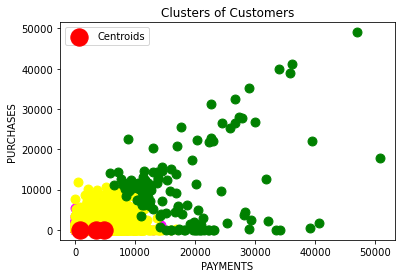

In [82]:
plt.scatter(fdata["PAYMENTS"][fdata.label == 0],fdata["PURCHASES"][fdata.label == 0],s=80,c='magenta')
plt.scatter(fdata["PAYMENTS"][fdata.label == 1],fdata["PURCHASES"][fdata.label == 1],s=80,c='yellow')
plt.scatter(fdata["PAYMENTS"][fdata.label == 2],fdata["PURCHASES"][fdata.label == 2],s=80,c='green')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('PAYMENTS')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()

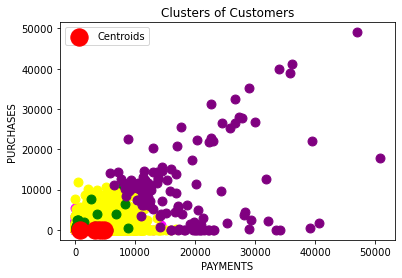

In [86]:
#k=4
kmeans=KMeans(n_clusters=4, random_state=0)  
kmeans.fit(fdata)
labels1=pd.DataFrame(kmeans.labels_)
labels1

fdata['label1']=labels1[0]
plt.scatter(fdata["PAYMENTS"][fdata.label1 == 0],fdata["PURCHASES"][fdata.label1 == 0],s=80,c='magenta')
plt.scatter(fdata["PAYMENTS"][fdata.label1 == 1],fdata["PURCHASES"][fdata.label1 == 1],s=80,c='yellow')
plt.scatter(fdata["PAYMENTS"][fdata.label1 == 2],fdata["PURCHASES"][fdata.label1 == 2],s=80,c='green')
plt.scatter(fdata["PAYMENTS"][fdata.label1 == 3],fdata["PURCHASES"][fdata.label1 == 3],s=80,c='purple')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('PAYMENTS')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()

interpretations:
hierarchical clustering gives us good clusters with pca 
k-means doesn't fit with the data decomposition and normalizations and gives us wrong centroides
agglomerative clusters give us clearer clusters 
